In [5]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt

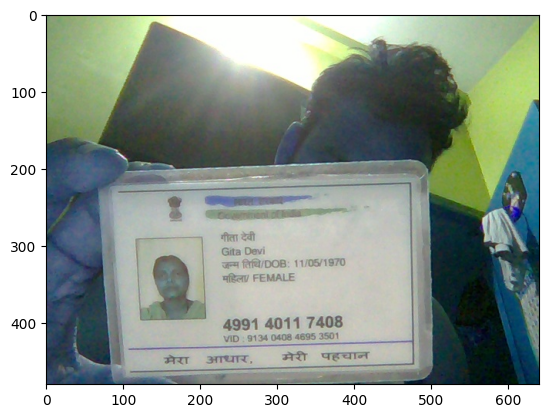

In [19]:
image_path = "static/captured_images/aadhar2.jpeg"
image = cv2.imread(image_path)
config = r'--oem 1 --psm 6 -l eng'
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# denoised_img = cv2.medianBlur(gray_image, 3)
plt.imshow(image)




In [20]:
text = pytesseract.image_to_string(image, config=config)
print(text)

—= eee set
- - ae yy.
e¢ fee ~» £
: e's
| fr &
‘a | |
: i
| t &:
| ow i) | x
4991 4011 7408 ‘
ee OL .
wrt TUT At qaaret
ee



In [18]:
import re


text = re.sub(r'[^a-zA-Z0-9/\s]', '', text)

print(text)
# 1️⃣ Extract Name: Pattern to match 3 capitalized words
name_pattern = re.compile(r'([A-Z][a-z]+\s[A-Z][a-z]+(?:\s[A-Z][a-z]+)?)')
name_match = name_pattern.search(text)
name = name_match.group() if name_match else "Not Found"

dob_pattern = re.compile(r'\b(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[0-2])/(19|20)\d{2}\b')
dob_match = dob_pattern.search(text)
dob = dob_match.group() if dob_match else "Not Found"

# 3️⃣ Extract Gender: Matches 'MALE' or 'FEMALE' (case-insensitive)
gender_pattern = re.compile(r'\b(MALE|FEMALE)\b', re.IGNORECASE)
gender_match = gender_pattern.search(text)
gender = gender_match.group().capitalize() if gender_match else "Not Found"

# 2️⃣ Extract DOB: Matches DDMMYY or DD/MM/YYYY
ad_no = re.compile(r'(\d{4}\s?\d{4}\s?\d{4})')
dob_match = ad_no.search(text)
if dob_match:
    aad_no = dob_match.groups()
    
else:
    aad_no = "Not Found"

# ✅ Display the results

print(f"name: {name}")
print(f"DOB: {dob}")
print(f"Gender: {gender}")
print(f"AD No: {aad_no[0]}")

ae 4
  
 

dai  
 Ere y
S  saaeeeenem 
ene
 34 Pf/DOB 11/05/1870
   afteav FEMALE  
u f 
4991 4011 7408  x
4  vip sro onne 4005 3501 
 Par sure ae cea 

name: Not Found
DOB: Not Found
Gender: Female
AD No: 4991 4011 7408


In [10]:
text = """
a i  Po 4 Se
   oe RUTGy 2 
key MIPPK7421
31 / Name
DIVYANSHU KUMAR
Fea WT ATE  Fatng  Mn
CHANDERSHWAR PRasap
"""


In [11]:

text = re.sub(r'[^a-zA-Z0-9/\s]', '', text)

print(text)
# 1️⃣ Extract Name: First, Middle, Last Name (Capitalized)
name_pattern = re.compile(r'(^[A-Z][a-z]+\s[A-Z][a-z]+(?:\s[A-Z][a-z]+)?)')
name_match = name_pattern.search(text)
name = name_match.group() if name_match else "Not Found"
print(f"name= {name}")
# Extract Father's Name
father_pattern = re.compile(r'Fathers?\s([A-Z][a-z]+\s[A-Z][a-z]+(?:\s[A-Z][a-z]+)?)')
father_match = father_pattern.search(text)
father_name = father_match.group(1) if father_match else "Not Found"

# 2️⃣ Extract DOB: Matches DD/MM/YYYY
dob_pattern = re.compile(r'\b(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[0-2])/(19|20)\d{2}\b')
dob_match = dob_pattern.search(text)
dob = dob_match.group() if dob_match else "Not Found"

# 3️⃣ Extract PAN Number: Pattern for PAN format
pan_pattern = re.compile(r'\b([A-Z]{5}\d{4}[A-Z])\b')
pan_match = pan_pattern.search(text)
pan_number = pan_match.group() if pan_match else "Not Found"

# ✅ Display Results
print(f"PAN Holder Name: {name}")
print(f"Father's Name: {father_name}")
print(f"DOB: {dob}")
print(f"PAN Number: {pan_number}")


a i  Po 4 Se
   oe RUTGy 2 
key MIPPK7421
31 / Name
DIVYANSHU KUMAR
Fea WT ATE  Fatng  Mn
CHANDERSHWAR PRasap

name= Not Found
PAN Holder Name: Not Found
Father's Name: Not Found
DOB: Not Found
PAN Number: Not Found


In [12]:
import re

# Sample text
text = """a2 i a
ie ‘ose eal ~
lors ee ‘ ma
en *
Se 5 ard an scan wre «gee
pe ie . MIPPK7421L TRESS
Suid Pesan eee
f ee (YANSHU KUMAR Sat ras >
© rar BTA Famers Name See Gey
_ CHANDERSHWAR PRASAD
2 2208
orn Bi arte / pyaethe- ema
Date OF Br
29/01/2003 Be"""

text = re.sub(r'[^a-zA-Z0-9/\s]', '', text)

text = " ".join([i for i in text.replace("\n"," ").strip().split(" ") if len(i)>3])

print(text)
# Regular expression patterns
pan_pattern = re.compile(r'[A-Z]{5}[0-9]{4}')  # Pattern for PAN card
name_pattern = re.compile(r'[A-Z][A-Z]+\s[A-Z][A-Z]+(?:\s[A-Z]+)?')  # Pattern for Names

# Extracting PAN and names
pan_match = pan_pattern.findall(text)
name_matches = name_pattern.findall(text)

print(name_matches)
dob_pattern = re.compile(r'\b(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[0-2])/(19|20)\d{2}\b')
dob_match = dob_pattern.search(text)
dob = dob_match.group() if dob_match else "Not Found"

if len(name_matches)>=2:
   name = name_matches[0]
   father_name = name_matches[1]
else:
   name = "Not found"
   father_name = "Not Found"

print(f"DOB: {dob}")
if len(pan_match)>0:
   pan_no = pan_match[0]
else:
   pan_no = "Not Found"
   
print(f"PAN Number: {pan_no}")

print(f"PAN Holder Name: {name}")
print(f"Father's Name: {father_name}")


lors scan MIPPK7421L TRESS Suid Pesan YANSHU KUMAR Famers Name CHANDERSHWAR PRASAD 2208 arte pyaethe Date 29/01/2003
['YANSHU KUMAR F', 'CHANDERSHWAR PRASAD']
DOB: 29/01/2003
PAN Number: MIPPK7421
PAN Holder Name: YANSHU KUMAR F
Father's Name: CHANDERSHWAR PRASAD


In [13]:
name_matches[0]

'YANSHU KUMAR F'

In [14]:
client = MongoClient("mongodb://localhost:27017/")
db = client["ocr_app_db"]  
data_collection = db["extracted_data"] 


NameError: name 'MongoClient' is not defined

In [ ]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")
db = client["ocr_app_db"]  
data_collection = db["student_details"] 


In [ ]:
student_data = {"name": "Divyanshu Kumar", "dob": "1997-07-05", "course": "B.Tech CSE"}
data_collection.insert_one(student_data)

InsertOneResult(ObjectId('67e8dcac466803b1d66af6d7'), acknowledged=True)

In [ ]:
for i in data_collection.find():
    print(i)

{'_id': ObjectId('67e8dcac466803b1d66af6d7'), 'name': 'Divyanshu Kumar', 'dob': '1997-07-05', 'course': 'B.Tech CSE'}
{'_id': ObjectId('67e8dd73466803b1d66af6d8'), 'name': 'Divyanshu Kumar2', 'dob': '1997-07-05', 'course': 'B.Tech CSE'}
{'_id': ObjectId('67e8ddc0466803b1d66af6d9'), 'name': 'Divyanshu Kumar2', 'dob': '1997-07-05', 'course': 'B.Tech CSE'}
{'_id': ObjectId('67e8e399ac46921cdfc3eced'), 'Name': 'Permanent Account Numbe', 'DOB': '05/07/1997', 'Gender': 'Not Found', 'AD_No': 'Not Found'}


In [ ]:
student_data = {"name": "Divyanshu Kumar2", "dob": "1997-07-05", "course": "B.Tech CSE"}
data_collection.insert_one(student_data)

InsertOneResult(ObjectId('67e8ddc0466803b1d66af6d9'), acknowledged=True)

In [ ]:
data_collection.find_one({"name":"Divyanshu Kumar2"})

{'_id': ObjectId('67e8dd73466803b1d66af6d8'),
 'name': 'Divyanshu Kumar2',
 'dob': '1997-07-05',
 'course': 'B.Tech CSE'}

In [ ]:
def fetch_student_details(id):
    from models.database import mongo
    student_xist = False
    if mongo.db.student_details.find(id): 
        student_xist = True
    return student_xist


In [4]:
from datetime import datetime


def make_attendence( aad_no,recognized):
    from models.database import mongo
    status = "Yes" if recognized else "No"

    today = datetime.now().strftime('%Y-%m-%d')
    
    data = {
          'student_id': aad_no[0],
          'date': today,
          'status': status
          
        
    }